In [1]:
import string
!pip install scipy
!pip install unidecode

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from unidecode import unidecode


In [3]:
#descargamos info para el preprocesado
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iaace\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
pd.read_csv('dialogos.csv')

,Unnamed: 0,speaker,dialog,length
0,0,amlo,"Amigas, amigos, paisanas, paisanos de Palenque:",47
1,1,amlo,Me da mucho gusto estar de nuevo en trabajos d...,91
2,2,amlo,"Antes de entrar en materia, quiero enviar un s...",471
3,3,amlo,Di la instrucción de que se mantengan trabajan...,338
4,4,amlo,"Quiero decirles a mis paisanos que padecen, qu...",113
...,...,...,...,...
155502,155502,amlo,¡Que viva Francisco I. Madero!,30
155503,155503,amlo,¡Que viva Venustiano Carranza!,30
155504,155504,amlo,¡Viva México!,13
155505,155505,amlo,¡Viva México!,13


In [5]:
dialogs= pd.read_csv('dialogos.csv',index_col=0)
dialogs['speaker']= np.where(dialogs['speaker']=='amlo','politico','medico')
dialogs

,speaker,dialog,length
0,politico,"Amigas, amigos, paisanas, paisanos de Palenque:",47
1,politico,Me da mucho gusto estar de nuevo en trabajos d...,91
2,politico,"Antes de entrar en materia, quiero enviar un s...",471
3,politico,Di la instrucción de que se mantengan trabajan...,338
4,politico,"Quiero decirles a mis paisanos que padecen, qu...",113
...,...,...,...
155502,politico,¡Que viva Francisco I. Madero!,30
155503,politico,¡Que viva Venustiano Carranza!,30
155504,politico,¡Viva México!,13
155505,politico,¡Viva México!,13


In [6]:
dialogs.sample(100)

,speaker,dialog,length
116102,politico,"El presidente Peña, también. Querían los franc...",274
46246,medico,"Eso es lo que estamos haciendo, es lo que segu...",326
17300,politico,Buenos días.,12
17434,politico,"Hay en México, como nunca, un combate permanen...",211
70656,politico,Ya no hay pensión para los expresidentes. En t...,267
...,...,...,...
154236,politico,"Y que actuemos con igualdad, nada de influyent...",442
112980,politico,Y ya le envié la carta al presidente Biden sob...,171
38872,medico,"Se analizaron los pormenores de los costos, la...",374
140237,politico,Cuatro mil 259 estudiantes de bachillerato tam...,64


necesitamos diferenciar entre politico, es decir es clasificacion binaria

In [7]:
## usaremos como metrica accuracy

{'politico': 0.7332081514015446, 'medico': 0.2667918485984554}

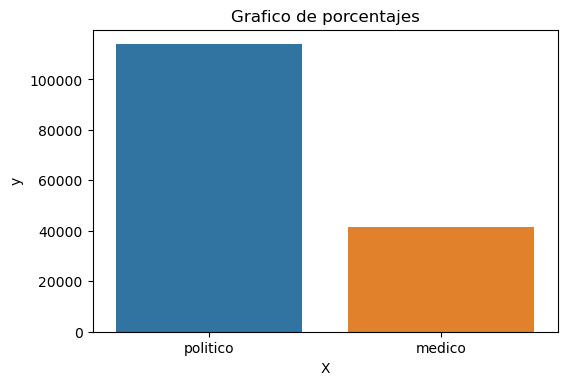

In [8]:
fig=plt.figure(dpi=100)
ax=fig.gca()
sns.countplot(x='speaker',data=dialogs,ax=ax)
ax.set_title('Grafico de porcentajes')
ax.set_xlabel('X')
ax.set_ylabel('y')
percentages= (dialogs['speaker'].value_counts()/len(dialogs)).to_dict()
percentages

<AxesSubplot:xlabel='length', ylabel='speaker'>

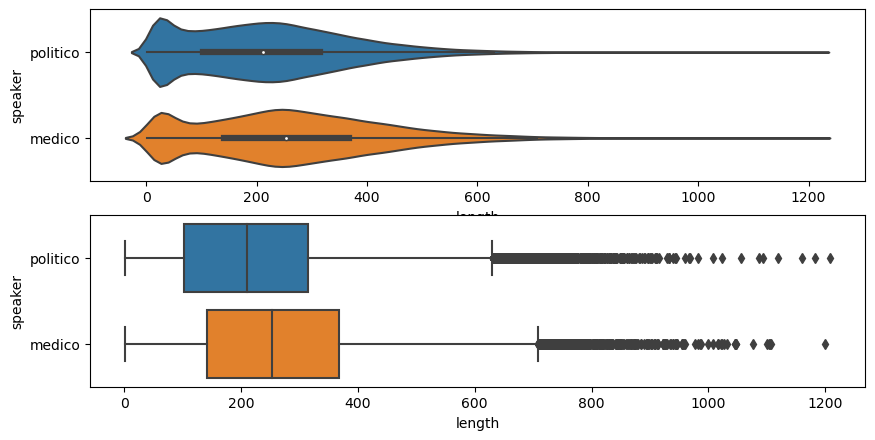

In [9]:
fig,(ax1,ax2)=plt.subplots(2,1,dpi=100,figsize=(10,5))
sns.violinplot(y='speaker',x='length',data=dialogs,ax=ax1) #todo esto debe ir la misma linea de codigo
sns.boxplot(y='speaker',x='length',data=dialogs,ax=ax2)

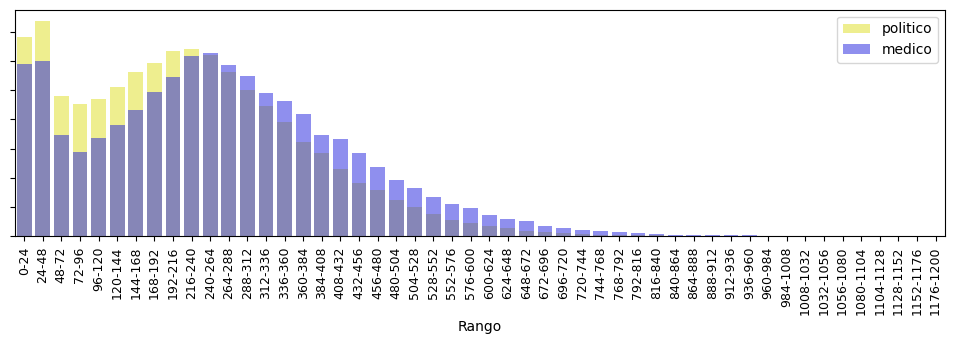

In [58]:
lengths = dialogs["dialog"].str.len()

dialog_lenghts = pd.DataFrame({
    "speaker": dialogs["speaker"],
    "length": lengths
})

fig = plt.figure(dpi=100, figsize=(12, 3))
ax = fig.gca()
for label, color in [("politico", "yellow"), ("medico", "blue")]:
    lengths = dialog_lenghts[dialog_lenghts["speaker"] == label]
    values, bins = np.histogram(lengths["length"], range=(0, 1200), bins=50)
    y = (bins[1:] + bins[:-1]) / 2
    sns.barplot(x=y, y=values/ len(lengths), label=label, color= color, ax=ax, alpha=0.5 )
ax.set_xticklabels([f"{int(_y)}-{int(_x)}" for _x,_y in zip(bins[1:], bins[:-1])], rotation=90, fontsize=9)
ax.set_yticklabels([])
ax.set_xlabel("Rango")
ax.legend()

In [ ]:
# dividiremos nuestro data set

In [11]:
from sklearn.model_selection import train_test_split

In [61]:
rest,test=train_test_split(dialogs,test_size=0.2,stratify=dialogs['speaker'],random_state=40)


155507

In [25]:
train, val=train_test_split(rest,test_size=0.2,stratify=rest['speaker'])
val

,speaker,dialog,length
4007,medico,"Necesariamente el que produce el producto, el ...",234
109869,politico,"Entonces, dijimos: Primero los que están atend...",163
96162,politico,En el caso de la petroquímica estamos buscando...,257
34431,medico,"Tu pregunta es muy importante, porque tu pregu...",287
130735,medico,"En México, aunque tiene subidas y bajadas dos ...",431
...,...,...,...
54168,medico,"Es más elaborado de reducirlo a fase uno, fase...",190
115231,politico,"Puede ser que a los de arriba no les parezca, ...",221
56920,politico,Me da mucho gusto estar de nuevo en este munic...,338
31379,medico,Las medidas de prevención en general son las m...,576


In [26]:
len(train), len(val), len(test)

(99524, 24881, 124405, 31102)

In [63]:
dialogs_train = train["dialog"]
dialogs_val = val["dialog"]
dialogs_test = test["dialog"]

target_train = train["speaker"]
target_val = val["speaker"]
target_test = test["speaker"]

dialogs_train
target_train

132161    politico
506       politico
39688     politico
96352     politico
147257      medico
            ...   
57591     politico
30249       medico
88639     politico
17451       medico
48432     politico
Name: speaker, Length: 99524, dtype: object

In [29]:
#ahora haremos featuring engineering

In [30]:
#transformamos las etiqueta en numeros

In [33]:
train_y = np.where(target_train == "politico", 1, 0)
val_y = np.where(target_val == "politico", 1, 0)
test_y = np.where(target_test == "politico", 1, 0)


array([1, 1, 1, ..., 1, 0, 1])


ahora viene lo dificil, ya que necesitamos procesar el texto de algun modo, para ello usaremos la llamada Tokenización, que le asignara a un valor a cada palabra o conjunto de palabras con similares caracteristicas 

In [34]:
# buscamos un discurso random de ejemplo
dialogs_train.sample(10, random_state=132).values
example_sentence = dialogs_train.iloc[80567]
print(example_sentence)

Además, podría decirse en otro tiempo que no había opciones, no había alternativas, no había trabajo, no había oportunidades para salir adelante. Ahora en Tabasco y en el país todos van a tener garantizado el derecho al trabajo.


In [35]:
# usaremos un herramienta de procesamiento natural llamada NLTK (Natural Language ToolKit)
from nltk.tokenize.toktok import ToktokTokenizer

tk_tokenizer = ToktokTokenizer()
tokens = tk_tokenizer.tokenize(example_sentence)
print(" # ".join(tokens))

Además # , # podría # decirse # en # otro # tiempo # que # no # había # opciones # , # no # había # alternativas # , # no # había # trabajo # , # no # había # oportunidades # para # salir # adelante. # Ahora # en # Tabasco # y # en # el # país # todos # van # a # tener # garantizado # el # derecho # al # trabajo # .


In [36]:
#vamos a crear una función que nos permita convertir una frase en tokens, a la vez que nos ayude a eliminar las tildes,
#los símbolos de puntuación, numeros y las stopwords

In [64]:
sp_stopwords = stopwords.words("spanish")
sp_stopwords

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [40]:
sp_stopwords = stopwords.words("spanish")



sp_punctuation = string.punctuation + '¿¡'

not_wanted = set((unidecode(word) for word in sp_stopwords)) | set(sp_punctuation)

tk_tokenizer = ToktokTokenizer()


def tokenize(sentence):
    clean = []
    clean_sentence = unidecode(sentence)
    for token1 in tk_tokenizer.tokenize(clean_sentence):
        token = token1.lower() #para dejar todo en miniscula
        if token in not_wanted:
            continue
        clean.append(token)
    return clean

print(tokenize(example_sentence))

['ademas', 'podria', 'decirse', 'tiempo', 'opciones', 'alternativas', 'trabajo', 'oportunidades', 'salir', 'adelante.', 'ahora', 'tabasco', 'pais', 'van', 'tener', 'garantizado', 'derecho', 'trabajo']


In [43]:
# ahora pasamos a vectorizar nuestro token

from sklearn.feature_extraction.text import CountVectorizer

vectorizador= CountVectorizer(binary=True, analyzer=tokenize, max_features=1000) # necesitamos que sea binario y no acumulativo las palabras
vectorizador.fit(dialogs_train)

train_x = vectorizador.transform(dialogs_train)
val_x = vectorizador.transform(dialogs_val)
test_x = vectorizador.transform(dialogs_test)
test_x

<31102x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 291423 stored elements in Compressed Sparse Row format>

In [44]:
# A MODELAR CHEMIMARE

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, class_weight="balanced")
lr.fit(train_x, train_y)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [45]:
train_pred = lr.predict(train_x)  # Para diagnosticar overfitting
val_pred = lr.predict(val_x)  # Para decidir cambios sobre el modelo

In [46]:
#Revisando las métricas 
from sklearn.metrics import accuracy_score
training_accuracy = accuracy_score(train_y, train_pred)
validation_accuracy = accuracy_score(val_y, val_pred)

print(f"Training accuracy:   {training_accuracy:0.2%}")
print(f"Validation accuracy: {validation_accuracy:0.2%}")

Training accuracy:   92.90%
Validation accuracy: 92.57%


In [95]:
#desempeño en el conjunto de prueba

test_pred = lr.predict(test_x)
test_accuracy = accuracy_score(test_y, test_pred)

print(f"Test accuracy:   {test_accuracy:0.2%}")

Test accuracy:   92.95%


In [92]:
oración = "soy politico y presindente de mexico"
own_x = vectorizador.transform([oración])
result = lr.predict(own_x)
medico, politico = lr.predict_proba(own_x).squeeze() * 100
print(f"{medico:05.2f}% – Médico\n{politico:05.2f}% - Político")

32.57% – Médico
67.43% - Político


In [93]:
result_bin = lr.predict(own_x)
if result_bin==[1]:
    print('Es político')
else: 
    print('Es medico')    

Es político


array([1])